In [1]:
import mne
import pandas as pd

In [2]:
epochs_fname = '/Users/hugofluhr/DATA/ds003505/derivatives/eeglab-v14.1.1/sub-01/eeg/sub-01_task-faces_desc-preproc_eeg.set'

In [4]:
beh_fname = '/Users/hugofluhr/DATA/ds003505/sub-01/eeg/sub-01_task-faces_events.tsv'
beh = pd.read_csv(beh_fname, sep="\t")
beh = beh[beh.bad_epoch == 0]

In [6]:
epochs = mne.read_epochs_eeglab(
            epochs_fname,
            events=None,
            event_id=None,
            eog=(),
            verbose=False,
            uint16_codec=None,
        )

epochs.events[:, 2] = list(beh.trial_type_id)

epochs.event_id = {"Scrambled": 0, "Faces": 1}

/var/folders/zw/s9jkbctn3193dlc4s0nyk3440000gn/T/ipykernel_2160/4252855035.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(


In [7]:
epochs

Number of events,588
Events,Faces: 294Scrambled: 294
Time range,-1.500 – 0.996 s
Baseline,off


In [8]:
montage_fname = '/Users/hugofluhr/DATA/ds003505/derivatives/mne/sub-01/sub-01_task-faces_montage.fif'
montage = mne.channels.read_dig_fif(montage_fname)

mapping = {f"EEG{str(i + 1).zfill(3)}": ch["ch_name"] for i, ch in enumerate(epochs.info["chs"])}
montage.rename_channels(mapping)

epochs.set_montage(montage)
epochs.apply_baseline((-0.2, 0))
epochs.set_eeg_reference(ref_channels="average", projection=True)

epochs.crop(tmin=-0.1, tmax=0.5)
#evoked = epochs[condition].average().pick("eeg")


Applying baseline correction (mode: mean)
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


Number of events,588
Events,Faces: 294Scrambled: 294
Time range,-0.100 – 0.500 s
Baseline,-0.200 – 0.000 s


In [9]:
epochs['Faces']

Number of events,294
Events,Faces: 294
Time range,-0.100 – 0.500 s
Baseline,-0.200 – 0.000 s


In [10]:
epochs['Scrambled']

Number of events,294
Events,Scrambled: 294
Time range,-0.100 – 0.500 s
Baseline,-0.200 – 0.000 s


In [27]:
epochs.apply_proj()

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


Number of events,588
Events,Faces: 294Scrambled: 294
Time range,-0.100 – 0.500 s
Baseline,-0.200 – 0.000 s


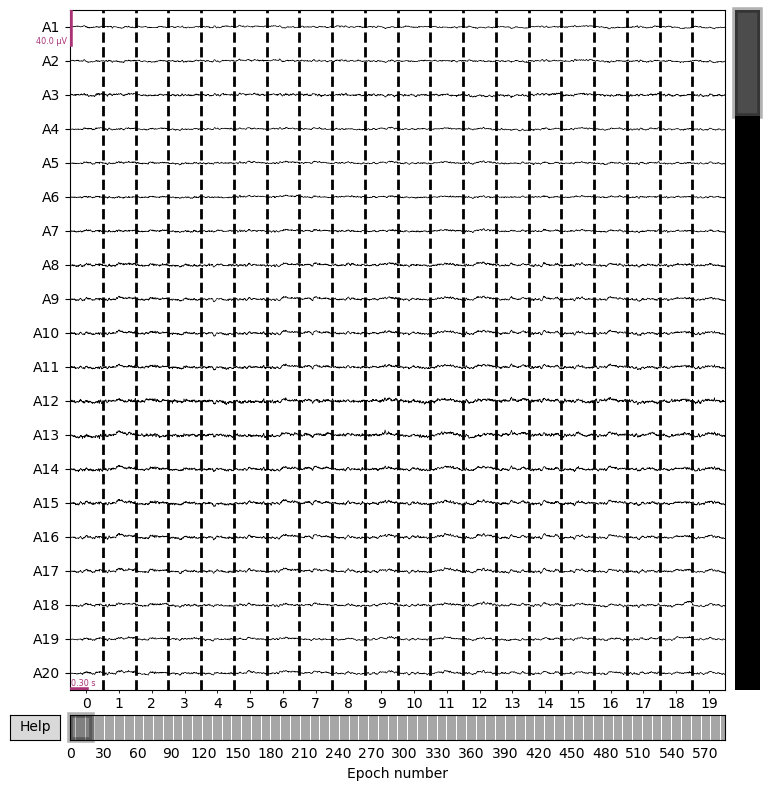

In [29]:
epochs.plot();

In [39]:
epochs

<Info | 9 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 128 EEG
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: Average EEG reference: on
 sfreq: 250.0 Hz
>